In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# - set gray colormap and nearest neighbor interpolation by default
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

In [4]:
# - make numpy print numbers to 4dp only
np.set_printoptions(precision=4, suppress=True)

In [5]:
import nipy

In [6]:
img = nipy.load_image('ds114_sub009_t2r1.nii')
img.coordmap

AffineTransform(
   function_domain=CoordinateSystem(coord_names=('i', 'j', 'k', 't'), name='voxels', coord_dtype=float64),
   function_range=CoordinateSystem(coord_names=('scanner-x=L->R', 'scanner-y=P->A', 'scanner-z=I->S', 't'), name='scanner', coord_dtype=float64),
   affine=array([[  -4.    ,    0.    ,    0.    ,    0.    ,  124.244 ],
                 [   0.    ,    3.9345,    0.7207,    0.    , -103.4497],
                 [   0.    ,   -0.7207,    3.9346,    0.    ,  -33.4929],
                 [   0.    ,    0.    ,    0.    ,    2.5   ,    0.    ],
                 [   0.    ,    0.    ,    0.    ,    0.    ,    1.    ]])
)

In [7]:
data = img.get_data()
data.shape

(64, 64, 30, 173)

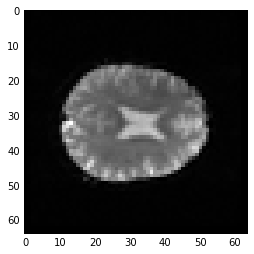

In [8]:
plt.imshow(data[:, :, 15, 0])

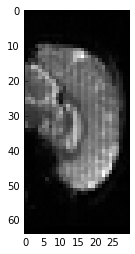

In [9]:
plt.imshow(data[32, :, :, 0])  # A sagittal slice

In [10]:
small_img = img[15:50, 8:55, ::2]

In [13]:
small_data = small_img.get_data()
small_data.shape

(35, 47, 15, 173)

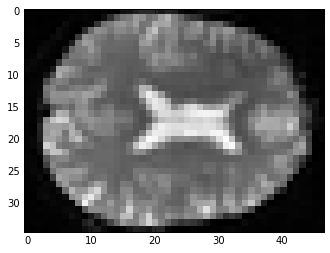

In [14]:
plt.imshow(small_data[:, :, 7, 0])

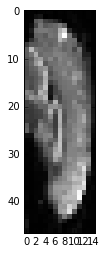

In [15]:
plt.imshow(small_data[17, :, :, 0])

In [16]:
small_img.affine

array([[ -4.    ,   0.    ,   0.    ,   0.    ,  64.244 ],
       [  0.    ,   3.9345,   1.4414,   0.    , -71.9734],
       [  0.    ,  -0.7207,   7.8691,   0.    , -39.2586],
       [  0.    ,   0.    ,   0.    ,   2.5   ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ,   1.    ]])

Dropping the first four scans because of the T1 effect:

In [17]:
img = img[..., 4:]

In [18]:
img.shape

(64, 64, 30, 169)

In [19]:
nipy.save_image(img, 'fixed.nii')

/Users/mb312/.virtualenvs/nibabel/lib/python2.7/site-packages/nipy/io/files.py:145: FutureWarning: Default `strict` currently False; this will change to True in a future version of nipy
  ni_img = nipy2nifti(img, data_dtype = io_dtype)


Image(
  data=memmap([[[[ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0],
                ..., 
                [ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0]],
       
               [[ 8, 10, ..., 10,  7],
                [11, 10, ...,  8, 10],
                ..., 
                [19, 11, ..., 20, 21],
                [28, 23, ..., 19, 35]],
       
               ..., 
               [[ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0],
                ..., 
                [ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0]],
       
               [[ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0],
                ..., 
                [ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0]]],
       
       
              [[[ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0],
                ..., 
                [ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0]],
       
               [[10, 10, ..